In [1]:
import networkx as nx
from fa2 import ForceAtlas2
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import numpy as np
import pickle
import os
import seaborn as sns

In [505]:
# Read correlation list
in_dir = r'..\merfish_data\140gene_example_analysis\networks\perm_interaction'
corr_l = pd.read_pickle(os.path.join(in_dir, 'merfish_cell_06_interactions_10_neighbors.pkl'))

In [506]:
# Read z-score list
z_in_dir = r'..\merfish_data\140gene_example_analysis\networks\z_score'
z_scores = pd.read_pickle(os.path.join(z_in_dir, 'merfish_cell_06_patch_z-score.pkl'))

In [418]:
graph_0 = nx.Graph()
graph_0.add_nodes_from(corr_l[0].columns.tolist())

In [419]:
for item1 in corr_l[0].columns.tolist():
    for item2 in corr_l[0].columns.tolist():
        if not item1 == item2 and abs(corr_l[0][item1][item2])>1.5:
            graph_0.add_edge(item1, item2, weight=corr_l[0][item1][item2])

In [420]:
pos = nx.spring_layout(graph_0)

In [421]:
z_scores = (z_scores - z_scores.min())+1

In [422]:
size_l = []
for item in corr_l[0].columns.tolist():
    size_l.append(z_scores.iloc[0][item]*500)

In [423]:
node_colors = []
for item in corr_l[0].columns.tolist():
    if item=='CONA' or item=='WGA':
        node_colors.append('#925e99dd')
    else:
        node_colors.append('#ffdc91')

In [424]:
edges,weights = zip(*nx.get_edge_attributes(graph_0,'weight').items())

In [425]:
cmap = sns.color_palette('vlag', as_cmap=True)

In [426]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=1,
                        strongGravityMode=True,
                        gravity=0.0,

                        # Log
                        verbose=True)
pos = forceatlas2.forceatlas2_networkx_layout(graph_0, pos=None, iterations=3)

100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 2922.18it/s]

BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


In [427]:
pos = nx.shell_layout(graph_0)
for k in pos.keys():
    pos[k] = (pos[k][0]*1.2, pos[k][1]*1.2)

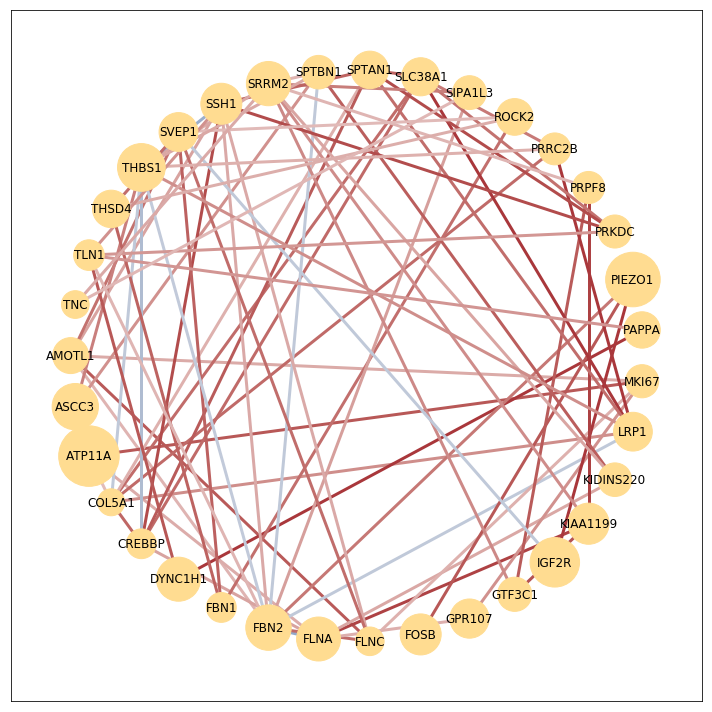

In [428]:
with rc_context({'figure.figsize': (10, 10), 'savefig.dpi': 600}):
    nx.draw_networkx(graph_0, pos = pos, width=3, with_labels=True,
                     node_size=size_l, node_color=node_colors, 
                     edge_color=weights, edge_cmap=cmap, edge_vmin=-5, edge_vmax=5,
                     font_weight='normal', font_size=12)
    plt.tight_layout()

In [192]:
out_dir = r'..\merfish_data\140gene_example_analysis\networks\interaction_networks'
out_fn_l = os.listdir(out_dir)
out_fn_l.sort()
corr_fn_l = os.listdir(in_dir)
corr_fn_l.sort()
z_fn_l = os.listdir(z_in_dir)
z_fn_l.sort()

In [193]:
graph = nx.Graph()
cmap = sns.color_palette('vlag', as_cmap=True)
for i in range(len(corr_fn_l)):
    corr_l = pd.read_pickle(os.path.join(in_dir, corr_fn_l[i]))
    z_scores = pd.read_pickle(os.path.join(z_in_dir, z_fn_l[i]))
    splits = corr_fn_l[i].split('_')
    cell_name = splits[0] + '_' + splits[1] + '_' + splits[2] + '_'
    for j in range(len(corr_l)):
        corr = corr_l[j]
        if corr is None:
            continue
        graph.clear()

        # Add nodes
        graph.add_nodes_from(corr.columns.tolist())

        # Add edges
        for item1 in corr.columns.tolist():
            for item2 in corr.columns.tolist():
                if not item1 == item2 and abs(corr[item1][item2])>1.5:
                    graph.add_edge(item1, item2, weight=corr[item1][item2])
        
        # Position of node
        pos = nx.shell_layout(graph)
        for k in pos.keys():
            pos[k] = pos[k] * 0.6
        
        # Size of nodes
        size_l = []
        for item in corr.columns.tolist():
            size_l.append(z_scores.iloc[j][item]*1000)

        # Node colors
        node_colors = []
        for item in corr.columns.tolist():
            if item=='CONA' or item=='WGA':
                node_colors.append('#925e99dd')
            else:
                node_colors.append('#ffdc91')

        # Edge colors
        edges,weights = zip(*nx.get_edge_attributes(graph,'weight').items())

        with rc_context({'figure.figsize': (10, 10), 'savefig.dpi': 600}):
            nx.draw_networkx(graph, pos = pos, width=5, with_labels=True,
                             node_size=size_l, node_color=node_colors, 
                             edge_color=weights, edge_cmap=cmap, edge_vmin=-5, edge_vmax=5,
                             font_weight='normal', font_size=12)
        plt.tight_layout()
        plt.savefig(os.path.join(out_dir,out_fn_l[i],cell_name+'_patch_'+str(j)+'.png'))
        plt.clf()

C:\Users\zfang38\Anaconda3\envs\network\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\zfang38\Anaconda3\envs\network\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\zfang38\Anaconda3\envs\network\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\zfang38\Anaconda3\envs\network\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\zfang38\Anaconda3\envs\network\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\z

ValueError: not enough values to unpack (expected 2, got 0)

<Figure size 720x720 with 0 Axes>

In [125]:
graph.edges

EdgeView([])

## Network subunit visualization of patch 3, 6, and 20

In [18]:
cols_list = []
for item in corr_l:
    cols_list.append(item.columns.tolist())

In [19]:
common_m = np.intersect1d(cols_list[3], cols_list[6])

In [22]:
common_m = np.intersect1d(common_m, cols_list[20])

In [23]:
common_m

array(['FBN2', 'FLNA', 'SIPA1L3', 'SON', 'SRRM2', 'SVEP1', 'THBS1', 'TNC',
       'TPR'], dtype='<U8')

In [203]:
sub_markers = ['TEAD1','LRP1','IGF2R','FBN2','TNC','FLNC','PRPF8',
               'COL5A1','THBS1','MALAT1','FLNA']

### patch 2

In [209]:
graph_0 = nx.Graph()
graph_0.add_nodes_from(sub_markers)

In [210]:
for item1 in sub_markers:
    for item2 in sub_markers:
        if not item1 == item2 and abs(corr_l[2][item1][item2])>1:
            graph_0.add_edge(item1, item2, weight=corr_l[2][item1][item2])

In [211]:
pos = nx.spring_layout(graph_0)

In [212]:
size_l = []
for item in sub_markers:
    size_l.append(z_scores.iloc[2][item]*500)

In [213]:
node_colors = []
for item in corr_l[0].columns.tolist():
    if item=='CONA' or item=='WGA':
        node_colors.append('#925e99dd')
    else:
        node_colors.append('#ffdc91')

In [214]:
edges,weights = zip(*nx.get_edge_attributes(graph_0,'weight').items())

In [215]:
cmap = sns.color_palette('vlag', as_cmap=True)

In [221]:
pos = nx.shell_layout(graph_0)
for k in pos.keys():
    pos[k] = pos[k] * 0.45

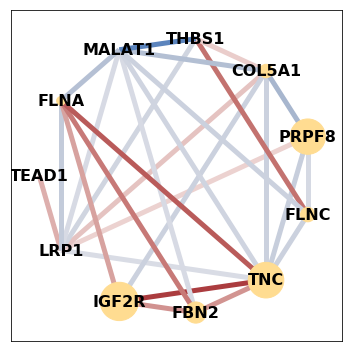

In [223]:
with rc_context({'figure.figsize': (5, 5), 'savefig.dpi': 600, 'figure.frameon':False}):
    nx.draw_networkx(graph_0, pos = pos, width=5, with_labels=True,
                     node_size=size_l, node_color=node_colors, 
                     edge_color=weights, edge_cmap=cmap, edge_vmin=-5, edge_vmax=5,
                     font_weight='bold', font_size=16)
    plt.tight_layout()
    plt.savefig(r'..\merfish_data\140gene_example_analysis\networks\patch2 sub markers.png')

### patch 3

In [557]:
graph_0 = nx.Graph()
graph_0.add_nodes_from(sub_markers)

In [558]:
for item1 in sub_markers:
    for item2 in sub_markers:
        if not item1 == item2 and abs(corr_l[3][item1][item2])>1:
            graph_0.add_edge(item1, item2, weight=corr_l[3][item1][item2])

In [559]:
pos = nx.shell_layout(graph_0)

In [560]:
size_l = []
for item in sub_markers:
    size_l.append(z_scores.iloc[3][item]*500)

In [561]:
node_colors = []
for item in corr_l[0].columns.tolist():
    if item=='CONA' or item=='WGA':
        node_colors.append('#925e99dd')
    else:
        node_colors.append('#ffdc91')

In [562]:
edges,weights = zip(*nx.get_edge_attributes(graph_0,'weight').items())

In [563]:
cmap = sns.color_palette('vlag', as_cmap=True)

In [576]:
pos = nx.shell_layout(graph_0)
for k in pos.keys():
    pos[k] = pos[k] * 0.18

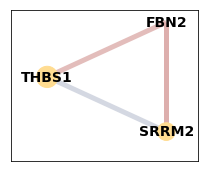

In [580]:
with rc_context({'figure.figsize': (3, 2.5), 'savefig.dpi': 600, 'figure.frameon':False}):
    nx.draw_networkx(graph_0, pos = pos, width=5, with_labels=True,
                     node_size=size_l, node_color=node_colors, 
                     edge_color=weights, edge_cmap=cmap, edge_vmin=-5, edge_vmax=5,
                     font_weight='bold', font_size=14)
    plt.tight_layout()
    plt.savefig(r'..\merfish_data\140gene_example_analysis\networks\patch3 sub markers.png')

### patch 6

In [581]:
graph_0 = nx.Graph()
graph_0.add_nodes_from(sub_markers)
for item1 in sub_markers:
    for item2 in sub_markers:
        if not item1 == item2 and abs(corr_l[6][item1][item2])>1:
            graph_0.add_edge(item1, item2, weight=corr_l[6][item1][item2])

In [588]:
pos = nx.shell_layout(graph_0)
for k in pos.keys():
    pos[k] = pos[k] * 0.2

In [589]:
size_l = []
for item in sub_markers:
    size_l.append(z_scores.iloc[3][item]*500)

In [590]:
node_colors = []
for item in corr_l[0].columns.tolist():
    if item=='CONA' or item=='WGA':
        node_colors.append('#925e99dd')
    else:
        node_colors.append('#ffdc91')

In [591]:
edges,weights = zip(*nx.get_edge_attributes(graph_0,'weight').items())

In [592]:
cmap = sns.color_palette('vlag', as_cmap=True)

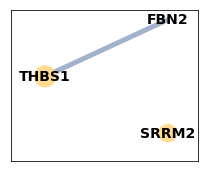

In [595]:
with rc_context({'figure.figsize': (3, 2.5), 'savefig.dpi': 600, 'figure.frameon':False}):
    nx.draw_networkx(graph_0, pos = pos, width=5, with_labels=True,
                     node_size=size_l, node_color=node_colors, 
                     edge_color=weights, edge_cmap=cmap, edge_vmin=-5, edge_vmax=5,
                     font_weight='bold', font_size=14)
    plt.tight_layout()
    plt.savefig(r'..\merfish_data\140gene_example_analysis\networks\patch6 sub markers.png')

### patch 20

In [130]:
graph_0 = nx.Graph()
graph_0.add_nodes_from(sub_markers)
for item1 in sub_markers:
    for item2 in sub_markers:
        if not item1 == item2 and abs(corr_l[20][item1][item2])>1:
            graph_0.add_edge(item1, item2, weight=corr_l[20][item1][item2])

In [143]:
pos = nx.shell_layout(graph_0)
for k in pos.keys():
    pos[k] = pos[k] * 0.4

In [144]:
size_l = []
for item in sub_markers:
    size_l.append(z_scores.iloc[20][item]*500)

In [145]:
node_colors = []
for item in corr_l[0].columns.tolist():
    if item=='CONA' or item=='WGA':
        node_colors.append('#925e99dd')
    else:
        node_colors.append('#ffdc91')

In [146]:
edges,weights = zip(*nx.get_edge_attributes(graph_0,'weight').items())

In [147]:
cmap = sns.color_palette('vlag', as_cmap=True)

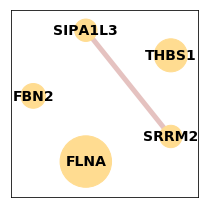

In [150]:
with rc_context({'figure.figsize': (3, 3), 'savefig.dpi': 600, 'figure.frameon':False}):
    nx.draw_networkx(graph_0, pos = pos, width=5, with_labels=True,
                     node_size=size_l, node_color=node_colors, 
                     edge_color=weights, edge_cmap=cmap, edge_vmin=-5, edge_vmax=5,
                     font_weight='bold', font_size=14)
    plt.tight_layout()
    plt.savefig(r'..\merfish_data\140gene_example_analysis\networks\patch20 sub markers.png')

## u2os networks

In [635]:
in_dir = r'Y:\coskun-lab\Zhou\4_HCR\2D_analyses_pipelines\merfish_data\bento_u2os\networks\perm_interaction'
corr_l = pd.read_pickle(os.path.join(in_dir, 'u2os_10-46_interactions_10_neighbors.pkl'))

In [636]:
z_in_dir = r'..\merfish_data\bento_u2os\networks\z_scores'
z_scores = pd.read_pickle(os.path.join(z_in_dir, 'merfish_u2os_10-46_cell_patch_z-score.pkl'))

In [637]:
graph_0 = nx.Graph()
graph_0.add_nodes_from(corr_l[0][0].columns.tolist())

In [638]:
for item1 in corr_l[0][0].columns.tolist():
    for item2 in corr_l[0][0].columns.tolist():
        if not item1 == item2 and abs(corr_l[0][0][item1][item2])>2:
            graph_0.add_edge(item1, item2, weight=corr_l[0][0][item1][item2])

In [639]:
pos = nx.spring_layout(graph_0)

In [640]:
z_scores = (z_scores - z_scores.min())+1

In [641]:
size_l = []
for item in corr_l[0][0].columns.tolist():
    size_l.append(z_scores.iloc[0][item]*500)

In [642]:
node_colors = []
for item in corr_l[0][0].columns.tolist():
    if item=='CONA' or item=='WGA':
        node_colors.append('#925e99dd')
    else:
        node_colors.append('#ffdc91')

In [643]:
edges,weights = zip(*nx.get_edge_attributes(graph_0,'weight').items())

In [644]:
cmap = sns.color_palette('vlag', as_cmap=True)

In [645]:
pos = nx.shell_layout(graph_0)
for k in pos.keys():
    pos[k] = pos[k] * 15

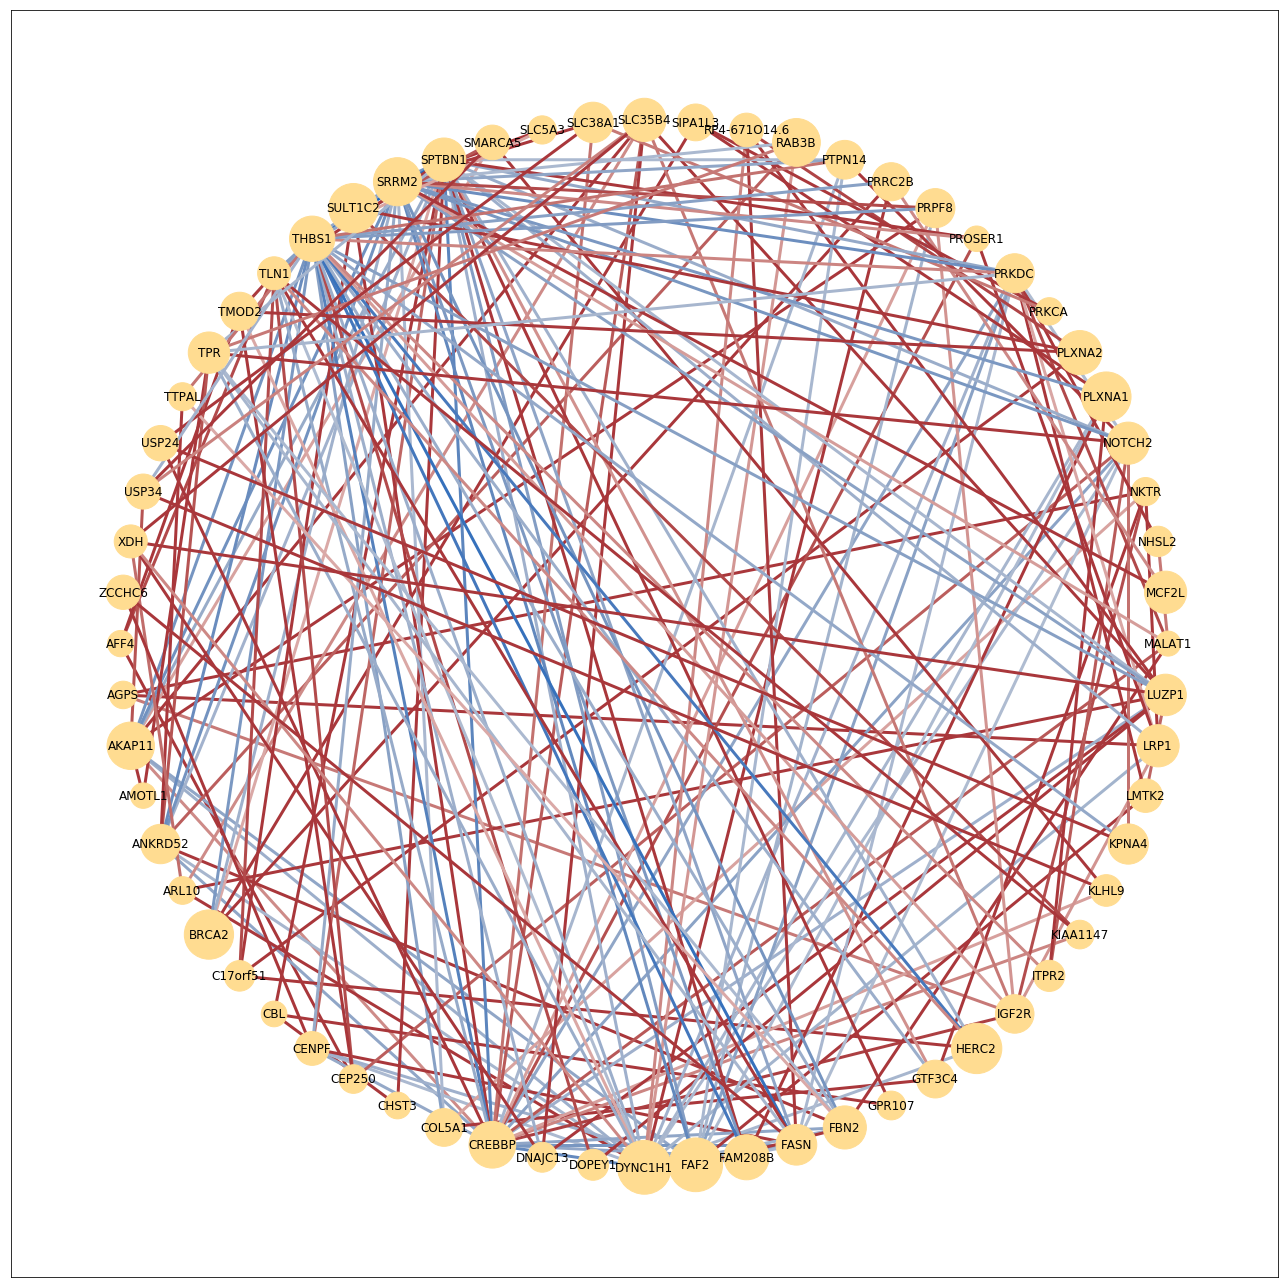

In [646]:
with rc_context({'figure.figsize': (18, 18), 'savefig.dpi': 600}):
    nx.draw_networkx(graph_0, pos = pos, width=3, with_labels=True,
                     node_size=size_l, node_color=node_colors, 
                     edge_color=weights, edge_cmap=cmap, edge_vmin=-5, edge_vmax=5,
                     font_weight='normal', font_size=12)
    plt.tight_layout()

In [371]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=0.6,
                        strongGravityMode=True,
                        gravity=0.0,

                        # Log
                        verbose=True)
pos = forceatlas2.forceatlas2_networkx_layout(graph_0, pos=None, iterations=1)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


In [363]:
for k in pos.keys():
    pos[k] = (pos[k][0]*1.2, pos[k][1]*1.2)

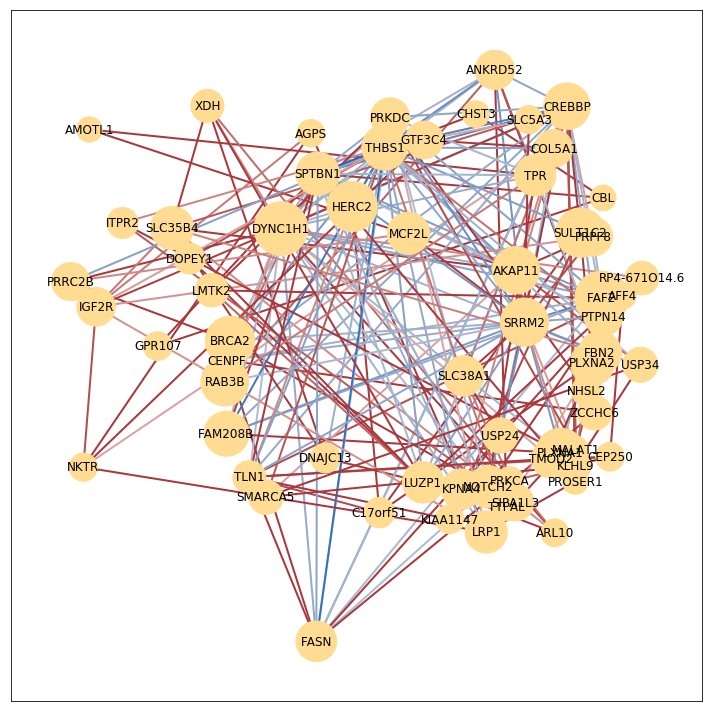

In [372]:
with rc_context({'figure.figsize': (10, 10), 'savefig.dpi': 600}):
    nx.draw_networkx(graph_0, pos = pos, width=2, with_labels=True,
                     node_size=size_l, node_color=node_colors, 
                     edge_color=weights, edge_cmap=cmap, edge_vmin=-5, edge_vmax=5,
                     font_weight='normal', font_size=12)
    plt.tight_layout()

In [647]:
sub_markers = ['THBS1','SRRM2','FBN2']

### Patch 3

In [648]:
graph_0 = nx.Graph()
graph_0.add_nodes_from(sub_markers)

In [655]:
for item1 in sub_markers:
    for item2 in sub_markers:
        if not item1 == item2:
            graph_0.add_edge(item1, item2, weight=corr_l[3][0][item1][item2])

In [657]:
size_l = []
for item in sub_markers:
    size_l.append(z_scores.iloc[3][item]*500)

In [658]:
node_colors = []
for item in corr_l[3][0].columns.tolist():
    if item=='CONA' or item=='WGA':
        node_colors.append('#925e99dd')
    else:
        node_colors.append('#ffdc91')

In [659]:
edges,weights = zip(*nx.get_edge_attributes(graph_0,'weight').items())

In [660]:
cmap = sns.color_palette('vlag', as_cmap=True)

In [668]:
pos = nx.shell_layout(graph_0)
for k in pos.keys():
    pos[k] = pos[k] * 0.22

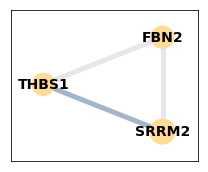

In [670]:
with rc_context({'figure.figsize': (3, 2.5), 'savefig.dpi': 600, 'figure.frameon':False}):
    nx.draw_networkx(graph_0, pos = pos, width=5, with_labels=True,
                     node_size=size_l, node_color=node_colors, 
                     edge_color=weights, edge_cmap=cmap, edge_vmin=-5, edge_vmax=5,
                     font_weight='bold', font_size=14)
    plt.tight_layout()
    plt.savefig(r'.\figures\u2os patch3 network.png')

### Patch 15

In [688]:
graph_0 = nx.Graph()
graph_0.add_nodes_from(sub_markers)

In [689]:
for item1 in sub_markers:
    for item2 in sub_markers:
        if not item1 == item2:
            graph_0.add_edge(item1, item2, weight=corr_l[15][0][item1][item2])

In [690]:
size_l = []
for item in sub_markers:
    size_l.append(z_scores.iloc[15][item]*500)

In [691]:
node_colors = []
for item in corr_l[15][0].columns.tolist():
    if item=='CONA' or item=='WGA':
        node_colors.append('#925e99dd')
    else:
        node_colors.append('#ffdc91')

In [692]:
edges,weights = zip(*nx.get_edge_attributes(graph_0,'weight').items())

In [693]:
cmap = sns.color_palette('vlag', as_cmap=True)

In [694]:
pos = nx.shell_layout(graph_0)
for k in pos.keys():
    pos[k] = pos[k] * 0.22

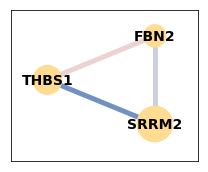

In [696]:
with rc_context({'figure.figsize': (3, 2.5), 'savefig.dpi': 600, 'figure.frameon':False}):
    nx.draw_networkx(graph_0, pos = pos, width=5, with_labels=True,
                     node_size=size_l, node_color=node_colors, 
                     edge_color=weights, edge_cmap=cmap, edge_vmin=-5, edge_vmax=5,
                     font_weight='bold', font_size=14)
    plt.tight_layout()
    plt.savefig(r'.\figures\u2os patch15 network.png')

# Single cell, multi patches networks

In [2]:
# Read correlation list
in_dir = r'..\merfish_data\140gene_example_analysis\gene_num_networks\permutation'
corr_l = pd.read_pickle(os.path.join(in_dir, '50gene_network.pkl'))

In [3]:
# Read z-score list
z_in_dir = r'..\merfish_data\140gene_example_analysis\gene_num_networks\z_score'
z_scores = pd.read_pickle(os.path.join(z_in_dir, '50gene_z_scores.pkl'))

In [12]:
out_dir = r'..\merfish_data\140gene_example_analysis\gene_num_networks\networks'
out_fn_l = os.listdir(out_dir)
out_fn_l.sort()
corr_fn_l = os.listdir(in_dir)
corr_fn_l.sort()
z_fn_l = os.listdir(z_in_dir)
z_fn_l.sort()

In [13]:
graph = nx.Graph()
cmap = sns.color_palette('vlag', as_cmap=True)
for i in range(len(corr_fn_l)):
    corr_l = pd.read_pickle(os.path.join(in_dir, corr_fn_l[i]))
    z_scores = pd.read_pickle(os.path.join(z_in_dir, z_fn_l[i]))
    splits = corr_fn_l[i].split('_')
    cell_name = splits[0] + '_'
    for j in range(len(corr_l)):
        corr = corr_l[j][0]
        if corr is None:
            continue
        graph.clear()

        # Add nodes
        graph.add_nodes_from(corr.columns.tolist())

        # Add edges
        for item1 in corr.columns.tolist():
            for item2 in corr.columns.tolist():
                if not item1 == item2 and abs(corr[item1][item2])>1.5:
                    graph.add_edge(item1, item2, weight=corr[item1][item2])
        
        # Position of node
        pos = nx.shell_layout(graph)
        for k in pos.keys():
            pos[k] = pos[k] * 0.6
        
        # Size of nodes
        size_l = []
        for item in corr.columns.tolist():
            size_l.append(z_scores.iloc[j][item]*1000)

        # Node colors
        node_colors = []
        for item in corr.columns.tolist():
            if item=='CONA' or item=='WGA':
                node_colors.append('#925e99dd')
            else:
                node_colors.append('#ffdc91')

        # Edge colors
        edges,weights = zip(*nx.get_edge_attributes(graph,'weight').items())

        with rc_context({'figure.figsize': (10, 10), 'savefig.dpi': 600}):
            nx.draw_networkx(graph, pos = pos, width=5, with_labels=True,
                             node_size=size_l, node_color=node_colors, 
                             edge_color=weights, edge_cmap=cmap, edge_vmin=-5, edge_vmax=5,
                             font_weight='normal', font_size=12)
        plt.tight_layout()
        plt.savefig(os.path.join(out_dir,out_fn_l[i],cell_name+'_patch_'+str(j)+'.png'))
        plt.clf()

C:\Users\zfang38\Anaconda3\envs\network\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\zfang38\Anaconda3\envs\network\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 720x720 with 0 Axes>